29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 9s - 21ms/step - accuracy: 0.7666 - loss: 0.6396 - val_accuracy: 0.8535 - val_loss: 0.4018
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.8524 - loss: 0.4122 - val_accuracy: 0.8702 - val_loss: 0.3534
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.8707 - loss: 0.3597 - val_accuracy: 0.8817 - val_loss: 0.3203
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.8806 - loss: 0.3276 - val_accuracy: 0.8882 - val_loss: 0.2974
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.8884 - loss: 0.3047 - val_accuracy: 0.8945 - val_loss: 0.2866
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.8962 - loss: 0.2832 - val_accuracy: 0.8983 - val_loss: 0.2722
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9018 - loss: 0.2678 - val_accuracy: 0.9042 - val_loss: 0.2616
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.9069 - loss: 0.2539 - val_accuracy: 0.9043 - val_loss: 0.2527
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9116 - loss: 0.2409 - val_accuracy: 0.9097 - val_loss: 0.2450


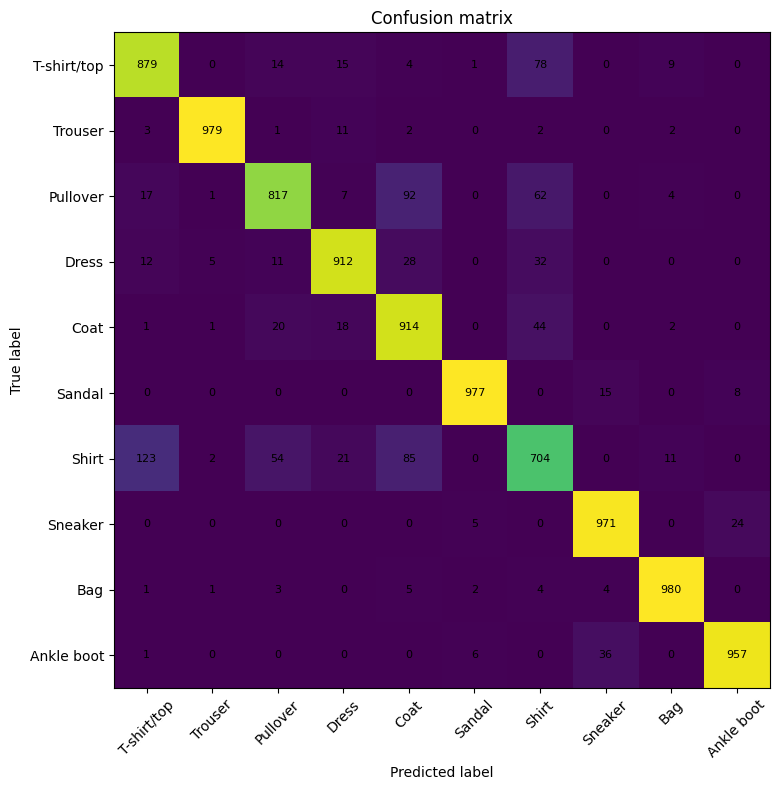

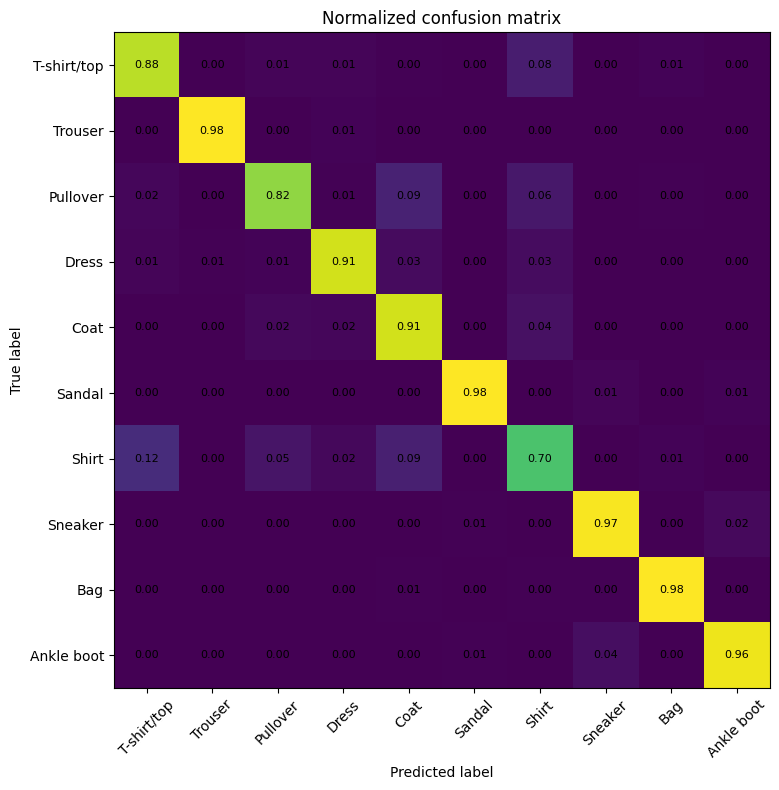

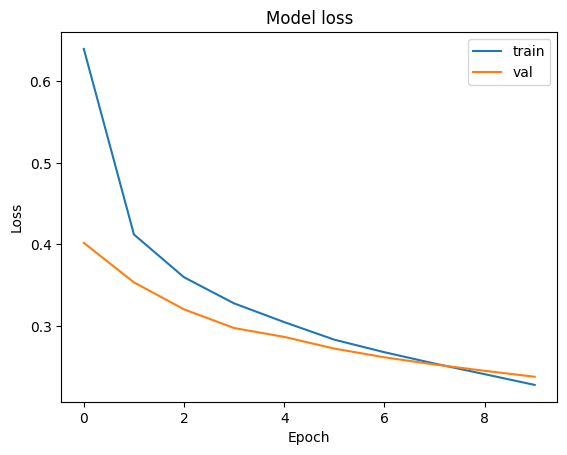

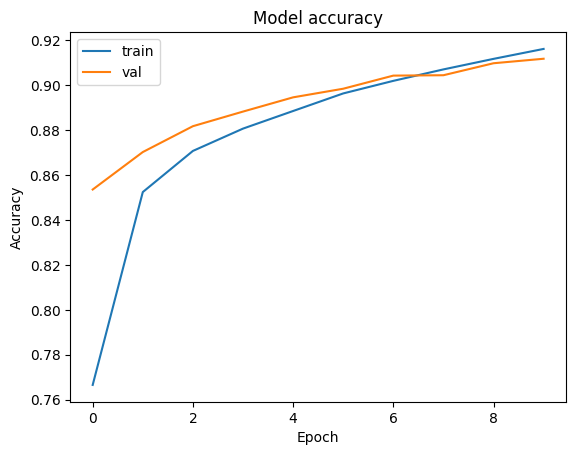

Model saved to /mnt/data/fashion_mnist_model.h5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import itertools

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

num_classes = 10
input_shape = x_train.shape[1:]

def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[es],
                    verbose=2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}  |  Test accuracy: {test_acc:.4f}")

y_pred_probs = model.predict(x_test, verbose=0)
y_pred = y_pred_probs.argmax(axis=1)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') if normalize else int(cm[i, j]),
                 horizontalalignment="center", verticalalignment="center", fontsize=8)
    plt.tight_layout()

plot_confusion_matrix(cm, class_names, normalize=False)
plt.show()
plot_confusion_matrix(cm, class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

model.save('/mnt/data/fashion_mnist_model.h5')
print("Model saved to /mnt/data/fashion_mnist_model.h5")